In [ ]:
! pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas
train = pandas.read_csv('https://github.com/Ashuto7h/ML-works/blob/main/HE%20%20challenges/reduce%20market%20waste%20-%20HE%20april%202021/train.csv?raw=true', na_values='?')
valid = pandas.read_csv('https://github.com/Ashuto7h/ML-works/blob/main/HE%20%20challenges/reduce%20market%20waste%20-%20HE%20april%202021/test.csv?raw=true',na_values='?')
train

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.60
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.90
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,NaN,"Georgakopoulos,Vasilios T",No,4,68.80
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.50
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,TitleJ7TDY,Flowers-Adams PLC,Banks,192800$,1195360.0$,2020-12-07,Product_1,1734434912,100 - 500 Million,Category 4,NaN,Kagaznagar,smt. chanchala,CEO/Co-Founder/Chairman,clairewilliams@flowersadams.com,Call centre manager,Contact Email,Level 1,More than a week back,"Jones,Eyvette W",We have all the requirements,4,107.34
7003,TitleO1IIN,"Kelly, Smith and Benton and Sons",Hospitals/Clinics,220208$,1453372.8$,2020-03-13,Product_2,(002)106-0243x03346,100 - 500 Million,Category 1,NaN,Proddatur,geeta @ komal,CEO,vanessaanderson@kelly.com,Financial risk analyst,Marketing Event,Level 2,NaN,"Brown,Maxine A",We have all the requirements,3,26.35
7004,TitleF1FWY,Romero-Juarez PLC,Semiconductors,253608$,NaN,2020-03-10,Product_1,777-231-4109x712,100 - 500 Million,Category 2,USA,"Rocky Mount, NC",Nicholas Duncan,SVP/General Counsel,nicholasduncan@romerojuarez.com,Nature conservation officer,Marketing Event,Level 3,NaN,"Logan,Kevin N",NaN,1,70.60
7005,TitleXVBNJ,"Sullivan, Mooney and Elliott LLC",Banks,118615$,794720.5$,2019-12-26,Product_1,001-212-631-5467x377,500 Million - 1 Billion,Category 2,USA,"Atlanta-Sandy Springs-Roswell, GA",Wayne Williams,Executive Vice President,waynewilliams@sullivan.com,"Designer, textile",Website,Level 3,NaN,"Cashin,Marc C",We have all the requirements,3,-5.00


# Profiling Dataset

In [ ]:
# !pip install --upgrade pandas_profiling 

In [ ]:
# from pandas_profiling import ProfileReport
# train.profile_report()

# Analysis and Preprocessing

### 23. Success_probability

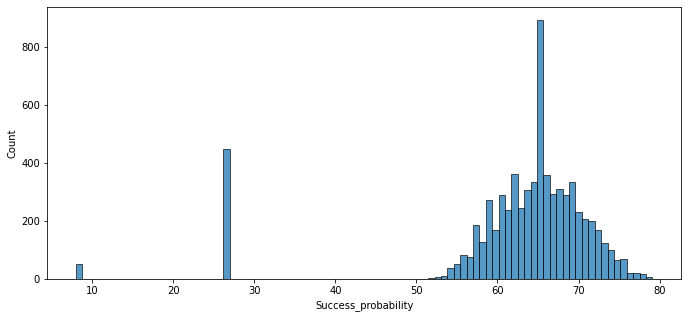

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn
train.loc[(train.Success_probability > 100) | (train.Success_probability < 0), 'Success_probability'] = train['Success_probability'].median()
fig = pyplot.figure(figsize = (25,5))
pyplot.subplot(121)
seaborn.histplot(data =train,x = train['Success_probability'])

### 1. Deal_title 

In [ ]:
deal_title = valid['Deal_title']
train.drop(columns = 'Deal_title', inplace= True)
valid.drop(columns = 'Deal_title', inplace= True)

### 2. Lead_name
### 8. Contact_no
### 13. POC_name
### 15. Lead_POC_email

In [ ]:
cols = ['Lead_name', 'Contact_no','POC_name','Lead_POC_email']
train = train.drop(columns = cols)
valid= valid.drop(columns = cols)

### 3. Industry
not affect much

In [ ]:
print(train['Industry'].value_counts())
train['Industry'].fillna(value = 'Banks', inplace =True)
valid['Industry'].fillna(value = 'Banks', inplace =True)

Banks                        1480
Insurance                     439
Financial Services            397
Real Estate                   209
Investment Bank/Brokerage     200
                             ... 
eMail/Messaging                 1
Auto Dealers                    1
Newspapers                      1
Speech Recognition              1
Internet                        1
Name: Industry, Length: 171, dtype: int64


### 4. Deal_value
### 5. Weighted Amount

In [ ]:
import numpy
cols = ['Deal_value', 'Weighted_amount']
for col in cols:
    train[col] = train[col].str.replace(r'\D', '')
    valid[col] = valid[col].str.replace(r'\D', '')
    train[col].fillna(value = -1, inplace = True)
    valid[col].fillna(value = -1, inplace = True)
    train[col] = train[col].astype(int)
    valid[col] = valid[col].astype(int)


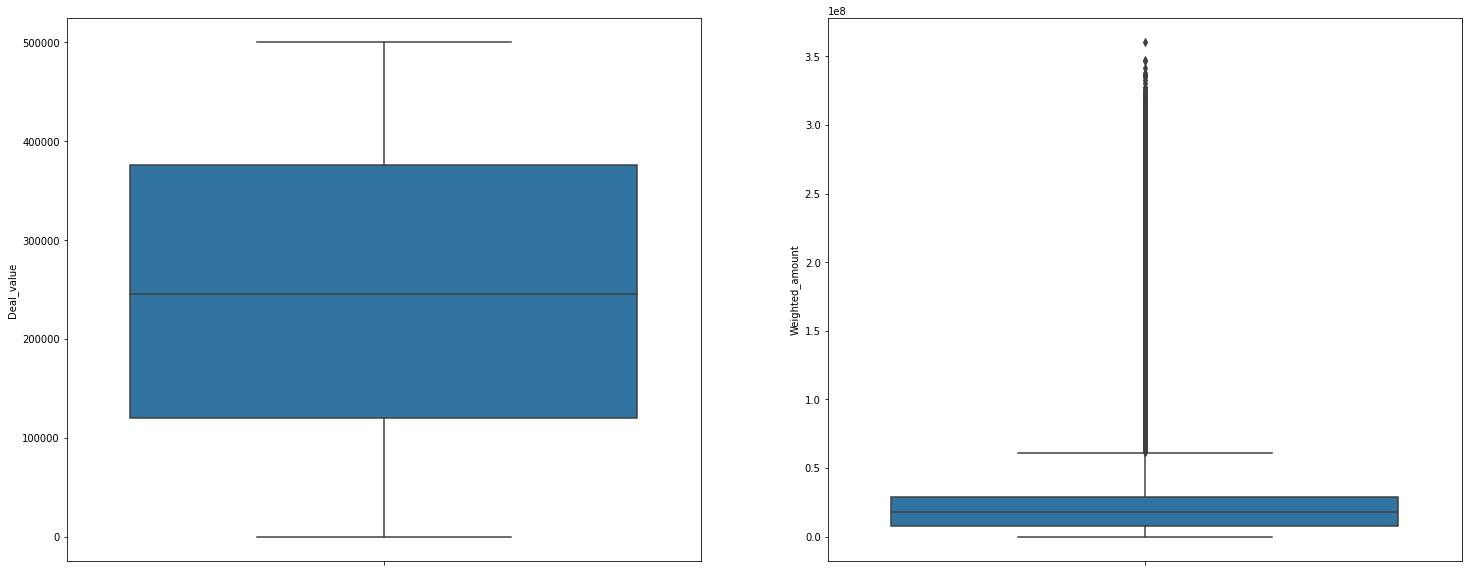

In [ ]:
pyplot.figure(figsize = (25,10))
i = 1
for col in cols:
    pyplot.subplot(int(str(1)+ str(len(cols)) + str(i)))
    seaborn.boxplot(data=train, y = col)
    i += 1

In [ ]:
print(train['Deal_value'].isna().sum())
train['Deal_value'].replace(-1, train['Deal_value'].mean(),inplace = True)
valid['Deal_value'].replace(-1, train['Deal_value'].mean(),inplace = True)
train['Weighted_amount'].replace(-1, train['Weighted_amount'].median(),inplace = True)
valid['Weighted_amount'].replace(-1, train['Weighted_amount'].median(),inplace = True)


0


### 6. Date_of_creation

In [ ]:
train['Date_of_creation'] = pandas.to_datetime(train['Date_of_creation'], format = '%Y-%m-%d',errors = 'coerce')
valid['Date_of_creation'] = pandas.to_datetime(valid['Date_of_creation'], format = '%Y-%m-%d',errors = 'coerce')

train['creation_year'] = train['Date_of_creation'].dt.year
train['creation_week'] = train['Date_of_creation'].dt.isocalendar().week
train['creation_day'] = train['Date_of_creation'].dt.day

valid['creation_year'] = valid['Date_of_creation'].dt.year
valid['creation_week'] = valid['Date_of_creation'].dt.isocalendar().week
valid['creation_day'] = valid['Date_of_creation'].dt.day

train.drop(columns=['Date_of_creation'],inplace = True)
valid.drop(columns=['Date_of_creation'],inplace = True)

### 11. Geography

In [ ]:
train['Geography'].fillna(value = 'USA', inplace =True)
valid['Geography'].fillna(value = 'USA', inplace =True)

### 12. Location

In [ ]:
vc = train['Location'].value_counts()
train['Location'].fillna(value = vc.index[0], inplace = True)
valid['Location'].fillna(value = vc.index[0], inplace = True)


### 19. Last_lead_update
affects

In [ ]:
vc = train['Last_lead_update'].value_counts()
train['Last_lead_update'].fillna(value = vc.index[0], inplace =True)
valid['Last_lead_update'].fillna(value = vc.index[0], inplace =True)

### 21.  Resource

In [ ]:
train['Resource'].fillna(value = 'No', inplace = True)
valid['Resource'].fillna(value = 'No', inplace = True)

# Visualization

In [ ]:
train.describe()

,Deal_value,Weighted_amount,Internal_rating,Success_probability,creation_year,creation_week,creation_day
count,7007.000000,7.007000e+03,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000
mean,249642.799708,4.635632e+07,3.009562,62.357578,2019.591551,25.293135,15.541887
std,144231.090899,7.239200e+07,1.418666,11.571424,0.600578,15.648143,8.856707
min,1551.000000,8.708000e+04,1.000000,8.000000,2019.000000,1.000000,1.000000
25%,123293.500000,1.072077e+07,2.000000,60.800000,2019.000000,11.000000,8.000000
50%,247838.912801,1.816656e+07,3.000000,65.300000,2020.000000,25.000000,15.000000
75%,375706.500000,2.912369e+07,4.000000,68.400000,2020.000000,39.000000,23.000000
max,500000.000000,3.601416e+08,5.000000,79.100000,2021.000000,53.000000,31.000000


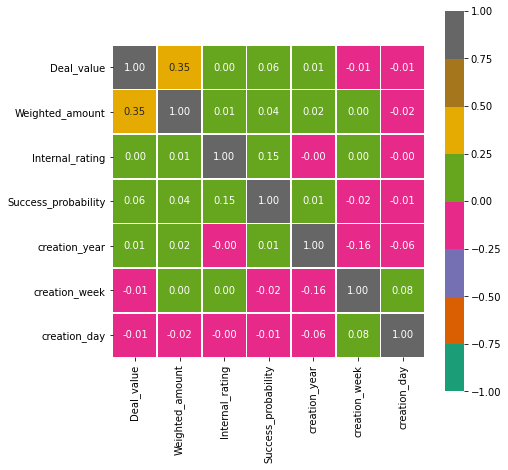

In [ ]:
pyplot.figure(figsize=(7,7))
seaborn.heatmap(train.corr(), annot = True, fmt = '.2f',square = True,vmax=1, vmin = -1,linewidths=0.5, cmap='Dark2')

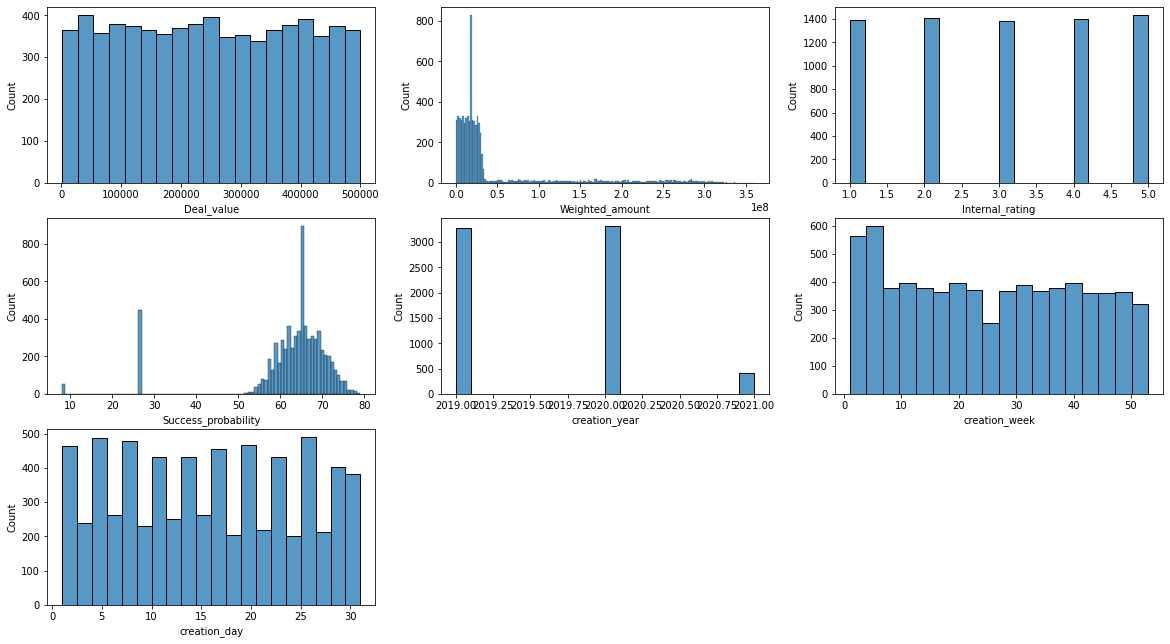

In [ ]:
cols = ['Deal_value','Weighted_amount','Internal_rating','Success_probability','creation_year','creation_week','creation_day']
i = 1
pyplot.figure(figsize=(20,11))
for col in cols:
    pyplot.subplot(int(str(33)+str(i)))
    seaborn.histplot(data = train, x = col)
    i += 1


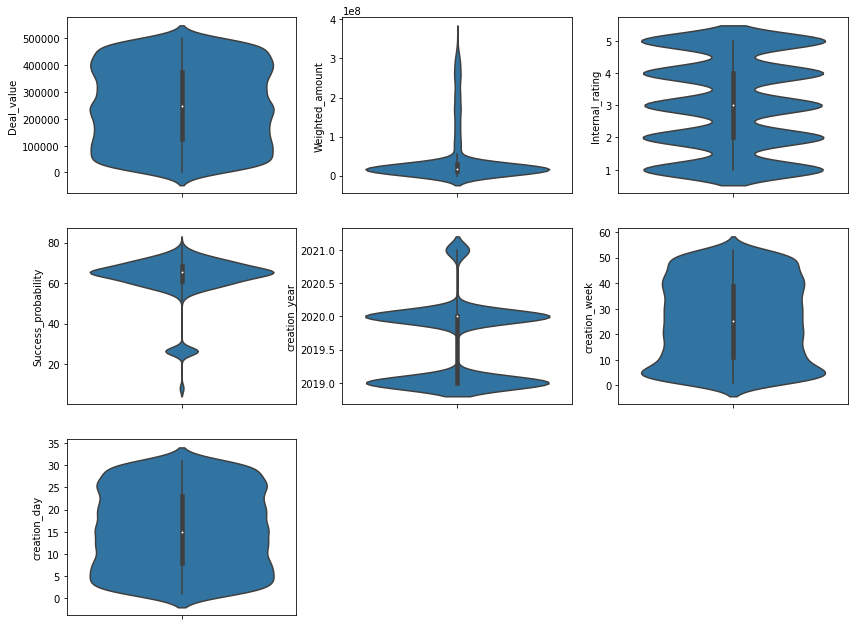

In [ ]:
cols = ['Deal_value','Weighted_amount','Internal_rating','Success_probability','creation_year','creation_week','creation_day']
i = 1
pyplot.figure(figsize=(14,11))
for col in cols:
    pyplot.subplot(int(str(33)+str(i)))
    seaborn.violinplot(data = train, y = train[col].astype(float))
    i += 1


# Scaling - Standardscaling

In [ ]:
cols = ['Deal_value','Weighted_amount','Internal_rating','creation_year','creation_week','creation_day']

from sklearn.preprocessing import StandardScaler
train[cols] = StandardScaler().fit_transform(train[cols].values)
valid[cols] = StandardScaler().fit_transform(valid[cols].values)

train

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,creation_year,creation_week,creation_day
0,Restaurants,0.491352,-0.354812,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,-0.006741,73.60,0.680141,-0.785653,1.519648
1,Construction Services,-1.457174,-0.607121,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,1.403136,58.90,-0.985041,0.172995,-0.625772
2,Hospitals/Clinics,0.760980,-0.307750,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",SVP/General Counsel,Health service manager,Marketing Event,Level 1,Following up but lead not responding,"Georgakopoulos,Vasilios T",No,0.698198,68.80,-0.985041,0.300815,1.293814
3,Real Estate,-1.198640,-0.575700,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,-1.416617,64.50,2.345324,-1.360842,1.632564
4,Financial Services,1.624268,-0.389432,Product_2,50 - 100 Million,Category 3,India,Shimoga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,0.698198,62.40,-0.985041,-0.274374,0.729230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,Banks,-0.394137,-0.475262,Product_1,100 - 500 Million,Category 4,USA,Kagaznagar,CEO/Co-Founder/Chairman,Call centre manager,Contact Email,Level 1,More than a week back,"Jones,Eyvette W",We have all the requirements,0.698198,65.30,0.680141,1.579013,-0.964523
7003,Hospitals/Clinics,-0.204095,-0.439619,Product_2,100 - 500 Million,Category 1,USA,Proddatur,CEO,Financial risk analyst,Marketing Event,Level 2,Following up but lead not responding,"Brown,Maxine A",We have all the requirements,-0.006741,26.35,0.680141,-0.913473,-0.287022
7004,Semiconductors,0.027494,-0.389432,Product_1,100 - 500 Million,Category 2,USA,"Rocky Mount, NC",SVP/General Counsel,Nature conservation officer,Marketing Event,Level 3,Following up but lead not responding,"Logan,Kevin N",No,-1.416617,70.60,0.680141,-0.913473,-0.625772
7005,Banks,-0.908522,-0.530609,Product_1,500 Million - 1 Billion,Category 2,USA,"Atlanta-Sandy Springs-Roswell, GA",Executive Vice President,"Designer, textile",Website,Level 3,Following up but lead not responding,"Cashin,Marc C",We have all the requirements,-0.006741,65.30,-0.985041,1.706833,1.180897


#Imputing Categorical variables

In [ ]:
y = train['Success_probability']
train.drop(columns='Success_probability', inplace= True)

In [ ]:

print(train.shape,valid.shape)
combo = pandas.concat([train,valid])
print(combo.shape)
combo = pandas.get_dummies(combo, drop_first=True)
# ohe = OneHotEncoder(drop='first') 
# ohe.fit_transform(combo)

(7007, 19) (2093, 19)
(9100, 19)


In [ ]:
combo

,Deal_value,Weighted_amount,Internal_rating,creation_year,creation_week,creation_day,Industry_Advertising/PR,Industry_Aerospace/Defense,Industry_Aircraft Parts,Industry_Airlines/Air Couriers,Industry_Alternative,Industry_Apparel Products,Industry_Apparel Retail,Industry_Appliances/Tools,Industry_Architecture/Engineering,Industry_Associations,Industry_Auto Dealers,Industry_Auto Manufacturers,Industry_Auto Parts/Services,Industry_Automotive/Transportation,Industry_B2B eCommerce,Industry_BSPs (Broadband),Industry_Banks,Industry_Beverages (Alcoholic),Industry_Beverages (Non-Alcoholic),Industry_BioTech/Drugs,Industry_Biotech/Healthcare,Industry_Book,Industry_Casinos/Gaming,Industry_Catalog/MailOrder,Industry_Chemical Manufacturing,Industry_Computer Hardware,Industry_Concrete/Cement,Industry_Conglomerates,Industry_Constr - Supplies,Industry_Constr/Agric Machinery,Industry_Construction Services,Industry_Construction/Agriculture,Industry_Consumer Products,Industry_Database,...,"Internal_POC_Hebron,Artenia D","Internal_POC_Heidelberg,Andre D","Internal_POC_Himes,Maurice C","Internal_POC_Houston,Arnold E","Internal_POC_Irizarry,Yolanda","Internal_POC_Jones,Eyvette W","Internal_POC_Jones,Michael L","Internal_POC_Kiepea,Prince A","Internal_POC_Knox,Antonio D","Internal_POC_Leu,Darren L","Internal_POC_Logan,Kevin N","Internal_POC_Mabrey,Kevin C","Internal_POC_Maine,John P","Internal_POC_Massiah,Gerard F","Internal_POC_McKenstry,Loretta A","Internal_POC_Meli,Teresa V","Internal_POC_Moran,Natalie A","Internal_POC_Morsy,Omar A","Internal_POC_Murray,Younetta","Internal_POC_Pappas,Mark S","Internal_POC_Robinson,John C","Internal_POC_Rocks,Michael J","Internal_POC_Ross,Eric L","Internal_POC_Ryker,David","Internal_POC_Salyers,Daniel L","Internal_POC_Shelton,Sidney P","Internal_POC_Smith,Keenan H","Internal_POC_Sutton,Michelle R","Internal_POC_Thomas,Lori E","Internal_POC_Tondeur,Keith D","Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K",Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes
0,0.491352,-0.354812,-0.006741,0.680141,-0.785653,1.519648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,-1.457174,-0.607121,1.403136,-0.985041,0.172995,-0.625772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.760980,-0.307750,0.698198,-0.985041,0.300815,1.293814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.198640,-0.575700,-1.416617,2.345324,-1.360842,1.632564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.624268,-0.389432,0.698198,-0.985041,-0.274374,0.729230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,1.192243,-0.248124,-0.475311,0.695785,1.438078,1.063766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2089,1.696450,3.563466,0.411730,-0.983889,1.053737,0.503198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2090,1.220227,3.102630,

In [ ]:
train = combo.iloc[:7007]
valid = combo.iloc[7007:]
train.shape, valid.shape

((7007, 1505), (2093, 1505))

# PCA

In [ ]:
train.shape,valid.shape

((7007, 1505), (2093, 1505))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state = 42)
pca.fit(train)
pca_train = pca.transform(train)
pca_valid = pca.transform(valid)
train = pandas.DataFrame(data = pca_train)
valid = pandas.DataFrame(data = pca_valid)

# Recursive Feature elimination

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      max_leaf_nodes=5, min_samples_leaf=28,
                      min_samples_split=5,
                      min_weight_fraction_leaf=0.2777777777777778,
                      random_state=42)
selector = RFECV(estimator, cv=5,verbose = 100)
selector = selector.fit(train, y)
selector.support_

Fitting estimator with 742 features.
Fitting estimator with 741 features.
Fitting estimator with 740 features.
Fitting estimator with 739 features.
Fitting estimator with 738 features.
Fitting estimator with 737 features.
Fitting estimator with 736 features.
Fitting estimator with 735 features.
Fitting estimator with 734 features.
Fitting estimator with 733 features.
Fitting estimator with 732 features.
Fitting estimator with 731 features.
Fitting estimator with 730 features.
Fitting estimator with 729 features.
Fitting estimator with 728 features.
Fitting estimator with 727 features.
Fitting estimator with 726 features.
Fitting estimator with 725 features.
Fitting estimator with 724 features.
Fitting estimator with 723 features.
Fitting estimator with 722 features.
Fitting estimator with 721 features.
Fitting estimator with 720 features.
Fitting estimator with 719 features.
Fitting estimator with 718 features.
Fitting estimator with 717 features.
Fitting estimator with 716 features.
F

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
cols = train.columns[selector.support_ == False]
cols
train.drop(columns = cols, inplace=True)
valid.drop(columns = cols, inplace=True)

In [ ]:
# column = pandas.read_csv('rfe.csv')
# column.columns = ['0','1']
# column = column['0'].values
# column

In [ ]:
# train = train[column]
# valid = valid[column]
# train

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

In [ ]:
train.columns.to_series().to_csv('rfe.csv')

# Training Models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import MultiTaskLasso, ElasticNet, MultiTaskElasticNet
from sklearn.linear_model import Lars, LassoLars, OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.linear_model import TweedieRegressor, PoissonRegressor,GammaRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, max_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:

def pcr(n_components=1,whiten = True, svd_solver = 'auto' ):
    return make_pipeline(StandardScaler(), PCA(n_components=n_components,
                                               whiten = whiten,
                                               svd_solver = svd_solver), LinearRegression())
models = [      
    LinearRegression(),
    Ridge(random_state = 42),
    Lasso(random_state = 42),
    ElasticNet(random_state = 42),
    Lars(random_state = 42),
    LassoLars(random_state = 42),
    OrthogonalMatchingPursuit(),
    BayesianRidge(),
    ARDRegression(),
    TweedieRegressor(),
    SGDRegressor(random_state = 42),
    PoissonRegressor(max_iter = 1000),
    GammaRegressor(),
    DecisionTreeRegressor(random_state = 42),
    # RandomForestRegressor(random_state = 42),
    KNeighborsRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    pcr(),
    PLSRegression()
]
params = [
          ['linear', {'normalize' : [True,False]}],
          ['ridge', {'alpha': numpy.logspace(0.01,100,100),
                     'normalize' : [True, False],
                     'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}],
          ['lasso', {'alpha' : numpy.logspace(0.01, 100, 100),
                     'normalize' : [True, False],
                     'precompute' : ['auto', True, False],
                     'positive' : [True, False],
                     'selection' : ['cyclic', 'random']}],
          ['elasticnet', {'alpha' : numpy.logspace(0.01,100,100),
                          'l1_ratio' : numpy.linspace(0.01, 1, 50),
                          'normalize': [True, False],
                          'selection' : ['cyclic', 'random'],
                          'precompute' : [True, False],
                          'positive' : [True,False]}],
          ['lars', {'normalize': [True, False],
                    'precompute' : [True, False],
                    'eps' : numpy.linspace(0.01, 2, 100),
                    'jitter' : numpy.linspace(0.1, 100, 100)}],
          ['lassolars', {'alpha' : numpy.logspace(0.01,100,100),
                         'normalize': [True, False],
                         'precompute' : [True, False],
                         'positive' :[True, False],
                         'jitter' : numpy.linspace(0.1, 100, 100)}],
          ['omp', {'normalize': [True, False],
                   'precompute' : [True, False]}],
          ['bayesian_ridge', {'alpha_1' : numpy.logspace(0.01, 100,100),
                              'alpha_2' : numpy.logspace(0.01, 100,100),
                              'lambda_1' : numpy.linspace(0.001, 1, 100),
                              'lambda_2' : numpy.linspace(0.001, 1, 100),
                              'lambda_init' : numpy.linspace(0.1, 1, 10),
                              'normalize' : [True, False]}],
          ['ard',  {'alpha_1' : numpy.logspace(0.01, 100,100),
                    'alpha_2' : numpy.logspace(0.01, 100,100),
                    'lambda_1' : numpy.linspace(0.001, 1, 100),
                    'lambda_2' : numpy.linspace(0.001, 1, 100),
                    'threshold_lambda' : numpy.linspace(0.1, 1, 10),
                    'normalize' : [True, False]}],
          ['tweedie', {'power' : [0,1,2,3],
                       'alpha' : numpy.logspace(0.01,100,100),
                       'link' : ['auto', 'identity', 'log']}],
          ['SGD', {'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                   'penalty' : ['l2', 'l1', 'elasticnet'],
                   'alpha' : numpy.logspace(0.01,100,100),
                   'l1_ratio' : numpy.linspace(0.001, 1, 100),
                   'shuffle' : [True,False],
                   'epsilon' : numpy.linspace(0.01, 1,30),
                   'learning_rate' : ['constant', 'invscaling', 'optimal', 'adaptive'],
                   'power_t' : numpy.linspace(0.1, 2, 50),
                   'validation_fraction' : numpy.linspace(0.1, 0.9,10),
                   'average' : [True,False]}],
          ['poisson', {'alpha' : numpy.logspace(0.01,100,100)}],
          ['gamma', {'alpha' : numpy.logspace(0.01,100,100)}],
          ['dtr', {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
                   'splitter' : ['best', 'random'],
                   'min_samples_split' : range(2, 30),
                   'min_samples_leaf' : range(1, 30),
                   'min_weight_fraction_leaf': numpy.linspace(0,0.5, 10),
                   'max_features' : ['auto', 'sqrt', 'log2'],
                   'max_leaf_nodes' : range(1,30)}],
        #   ['rfr', {'n_estimators' : range(2, 100, 50),
        #            'criterion' : ['mse', 'mae'],
        #            'max_depth' : [None, 10,20,30,40,50,60,70,80,90,100],
        #            'min_samples_split' : range(2, 30),
        #            'min_samples_leaf' : range(1, 30),
        #            'min_weight_fraction_leaf': numpy.linspace(0,0.5, 10),
        #            'max_features' : ['auto', 'sqrt', 'log2'],
        #            'max_leaf_nodes' : range(1,30),
        #            'bootstrap' : [True, False],
        #            'oob_score' : [True,False],
        #            'max_samples' : numpy.linspace(0.1,1, 10),
        #            'ccp_alpha' : numpy.linspace(0.01, 100, 100)}],
          ['knn' , {'n_neighbors' : range(2, 30),
                    'weights' : ['uniform', 'distance'],
                    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'p' : [1,2],
                    'metric' : ['euclidean','manhattan','chebyshev','minkowski','seuclidean','mahalanobis']}],
          ['svr', {}],
          ['gbr', {}],
        #   ['svr', {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        #            'degree' : [1,2,3,4,5,6,7,8,9],
        #            'gamma' : ['scale', 'auto'],
        #            'C' : numpy.logspace(1, 100, 100),
        #            'epsilon' : numpy.linspace(0.01, 1, 20),
        #            'shrinking' : [True,False]}],
        #   ['gbr', {'loss' : ['ls', 'lad','huber', 'quantile'],
        #            'learning_rate': numpy.linspace(0.01, 1, 50),
        #            'n_estimators': range(20, 120, 5),
        #            'subsample' : numpy.linspace(0.1, 1.0, 20),
        #            'criterion' : ['friedman_mse', 'mse', 'mae'],
        #            'max_depth' : [None, 10,20,30,40,50,60,70,80,90,100],
        #            'min_samples_split' : range(2, 30),
        #            'min_samples_leaf' : range(1, 30),
        #            'min_weight_fraction_leaf': numpy.linspace(0,0.5, 10),
        #            'ccp_alpha' : numpy.linspace(0.1, 10, 100)}],
          ['pcr', {'pca__n_components' : numpy.linspace(0,1,50),
                   'pca__whiten' : [True, False],
                   'pca__svd_solver' : ['auto', 'full', 'arpack', 'randomized']}],
        #   ['pls', {'n_components' : range(1,1505),
        #            'scale' : [True, False]}],
          ['pls', {}]         
]

In [ ]:
train_score = {'mean_sq_err' : [],
         'max_err': [],
         'r2' : [],
         'percent_err' : []}    

test_score = {'mean_sq_err' : [],
         'max_err': [],
         'r2' : [],
         'percent_err' : []}    

import traceback
for i in range(len(models)):
    try:
        print(params[i][0])
        clf = RandomizedSearchCV(models[i],
                            param_distributions= params[i][1],
                            cv = 5,
                            scoring = "neg_mean_squared_error",
                            n_jobs = 5, verbose = 100)

        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        y_train_pred = clf.predict(x_train)
        train_score['mean_sq_err'].append(clf.best_score_)
        train_score['max_err'].append(max_error(y_train,y_train_pred))
        train_score['r2'].append(r2_score(y_train,y_train_pred))
        train_score['percent_err'].append(mean_absolute_percentage_error(y_train,y_train_pred))

        test_score['mean_sq_err'].append(mean_squared_error(y_test,y_pred))
        test_score['max_err'].append(max_error(y_test,y_pred))
        test_score['r2'].append(r2_score(y_test,y_pred))
        test_score['percent_err'].append(mean_absolute_percentage_error(y_test,y_pred))

        print()
        print('best_estimator :', clf.best_estimator_)
        print('train report :')
        for key in train_score:
            print(f'  {key} : {train_score[key][i]}')

        print('test report :')
        for key in test_score:
            print(f'  {key} : {test_score[key][i]}')
    except Exception as e:
        print('\n\n ', e)
    print("---------------------------------------------------------------------------")

linear
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)



best_estimator : LinearRegression(normalize=True)
train report :
  mean_sq_err : -123.68162505286787
  max_err : 60.30452892727199
  r2 : 0.1324097094349337
  percent_err : 0.18210369467192705
test report :
  mean_sq_err : 126.15023067144347
  max_err : 67.72700512587356
  r2 : 0.07214582051079343
  percent_err : 0.18592802316211615
---------------------------------------------------------------------------
ridge
Fitting 5 folds for each of 10 candidates, totalling 50 fits

best_estimator : Ridge(alpha=1174897.5549395303, random_state=42, solver='cholesky')
train report :
  mean_sq_err : -133.21472092422835
  max_err : 54.35248621506983
  r2 : 0.0003575093575040045
  percent_err : 0.20081243721786893
test report :
  mean_sq_err : 135.91747711534666
  max_err : 54.35472514617604
  r2 : 0.0003062337986611263
  percent_err : 0.1991242154015093
---------------------------------------------------------------------------
lasso
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-133.25122338 -133.25122338 -133.25122338           nan           nan
 -133.25122338 -133.25122338 -133.25122338 -133.25122338 -133.25122338]
  category=UserWarning



best_estimator : Lasso(alpha=1.65958690743757e+21, normalize=True, random_state=42)
train report :
  mean_sq_err : -133.2512233785095
  max_err : 54.337802093244534
  r2 : 0.0
  percent_err : 0.20086452785834896
test report :
  mean_sq_err : 135.96536807508414
  max_err : 54.337802093244534
  r2 : -4.601151167782369e-05
  percent_err : 0.19917572088758861
---------------------------------------------------------------------------
elasticnet
Fitting 5 folds for each of 10 candidates, totalling 50 fits

best_estimator : ElasticNet(alpha=1.023292992280754, l1_ratio=0.19183673469387755, positive=True,
           precompute=True, random_state=42)
train report :
  mean_sq_err : -132.3945700050514
  max_err : 54.9317998196488
  r2 : 0.006801993411788776
  percent_err : 0.19987398044115862
test report :
  mean_sq_err : 135.09222723151015
  max_err : 54.724455143568505
  r2 : 0.0063760725121151385
  percent_err : 0.1981803407615848
--------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)



best_estimator : OrthogonalMatchingPursuit(normalize=False, precompute=True)
train report :
  mean_sq_err : -120.31352150376638
  max_err : 60.90109088614567
  r2 : 0.10650700773853894
  percent_err : 0.1844192298377678
test report :
  mean_sq_err : 120.99336422793783
  max_err : 61.263006763326814
  r2 : 0.11007535942013036
  percent_err : 0.18165778551166153
---------------------------------------------------------------------------
bayesian_ridge
Fitting 5 folds for each of 10 candidates, totalling 50 fits

best_estimator : BayesianRidge(alpha_1=1.65958690743757e+21, alpha_2=12882495516.931322,
              lambda_1=0.9798181818181818, lambda_2=0.18263636363636365,
              lambda_init=1.0, normalize=True)
train report :
  mean_sq_err : -123.6816250528677
  max_err : 60.30452892727192
  r2 : 0.13240970943493346
  percent_err : 0.182103694671927
test report :
  mean_sq_err : 126.15023067144335
  max_err : 67.72700512587339
  r2 : 0.07214582051079421
  percent_err : 0.185928023

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [  -4018.7261889     -135.35103712   -7101.49138163    -139.13707627
    -229.93719749    -133.47111517   -1977.8055196  -122176.73792762
              nan              nan]
  category=UserWarning



best_estimator : SGDRegressor(alpha=1.9498445997580574e+28, epsilon=0.6586206896551725,
             l1_ratio=0.6770909090909091, learning_rate='constant',
             penalty='l1', power_t=0.5265306122448979, random_state=42,
             validation_fraction=0.7222222222222222)
train report :
  mean_sq_err : -133.47111516648098
  max_err : 53.80946852016988
  r2 : -0.0020958766566847586
  percent_err : 0.20226560372898655
test report :
  mean_sq_err : 136.32807929145912
  max_err : 53.80946852016988
  r2 : -0.0027138078071728966
  percent_err : 0.20083785575704766
---------------------------------------------------------------------------
poisson
Fitting 5 folds for each of 10 candidates, totalling 50 fits

best_estimator : PoissonRegressor(alpha=1.023292992280754, max_iter=1000)
train report :
  mean_sq_err : -120.77538963214158
  max_err : 60.500649356891955
  r2 : 0.11628140887283078
  percent_err : 0.18332295970699578
test report :
  mean_sq_err : 122.11525229611246
  max_err : 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-137.79197193 -133.62066794 -132.55943332           nan -137.87181208
 -136.61011846 -129.74810882 -136.40643625 -137.96822788 -141.95820029]
  category=UserWarning



best_estimator : DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      max_leaf_nodes=14, min_samples_leaf=13,
                      min_weight_fraction_leaf=0.05555555555555555,
                      random_state=42, splitter='random')
train report :
  mean_sq_err : -129.74810882412712
  max_err : 57.99264705882348
  r2 : 0.03870611733070162
  percent_err : 0.1950066716815642
test report :
  mean_sq_err : 130.93755027240684
  max_err : 57.99264705882348
  r2 : 0.036934354969573535
  percent_err : 0.19390283498337696
---------------------------------------------------------------------------
knn
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-130.61679672 -140.76637046 -142.38319801 -133.38753024 -130.32267169
 -132.20323804           nan -130.47079978 -136.4191218  -130.97068996]
  category=UserWarning



best_estimator : KNeighborsRegressor(metric='euclidean', n_neighbors=26, p=1)
train report :
  mean_sq_err : -130.32267168841733
  max_err : 57.81153846153846
  r2 : 0.0961385799484642
  percent_err : 0.18835780008925565
test report :
  mean_sq_err : 130.61481729671584
  max_err : 61.011538461538464
  r2 : 0.039308105209743927
  percent_err : 0.1928367096473589
---------------------------------------------------------------------------
svr
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)



best_estimator : SVR()
train report :
  mean_sq_err : -129.64344942391267
  max_err : 65.39306735882936
  r2 : 0.05419168489475268
  percent_err : 0.1667100270489891
test report :
  mean_sq_err : 130.87031274634722
  max_err : 66.86798000372377
  r2 : 0.0374288972247947
  percent_err : 0.1698723971106527
---------------------------------------------------------------------------
gbr
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)



best_estimator : GradientBoostingRegressor()
train report :
  mean_sq_err : -126.98377863351402
  max_err : 57.40232651497139
  r2 : 0.3420901177842348
  percent_err : 0.15557458470370425
test report :
  mean_sq_err : 124.87249863048746
  max_err : 59.887497742573316
  r2 : 0.08154373447542229
  percent_err : 0.1844225912156566
---------------------------------------------------------------------------
pcr
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-127.79168117           nan           nan           nan -130.94289238
           nan -124.12379567           nan -131.6273472            nan]
  category=UserWarning



best_estimator : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9591836734693877)),
                ('linearregression', LinearRegression())])
train report :
  mean_sq_err : -124.12379566677973
  max_err : 60.59716876839791
  r2 : 0.12988942421522487
  percent_err : 0.18253757882032975
test report :
  mean_sq_err : 126.97446991042669
  max_err : 67.843023231119
  r2 : 0.06608341524431849
  percent_err : 0.18668854799918752
---------------------------------------------------------------------------
pls
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)



best_estimator : PLSRegression()
train report :
  mean_sq_err : -123.61063881818913
  max_err : 60.28841866959574
  r2 : 0.13240344076214428
  percent_err : 0.18210233335813397
test report :
  mean_sq_err : 126.14494819701402
  max_err : 67.76461503962486
  r2 : 0.07218467391558958
  percent_err : 0.18591973803109346
---------------------------------------------------------------------------


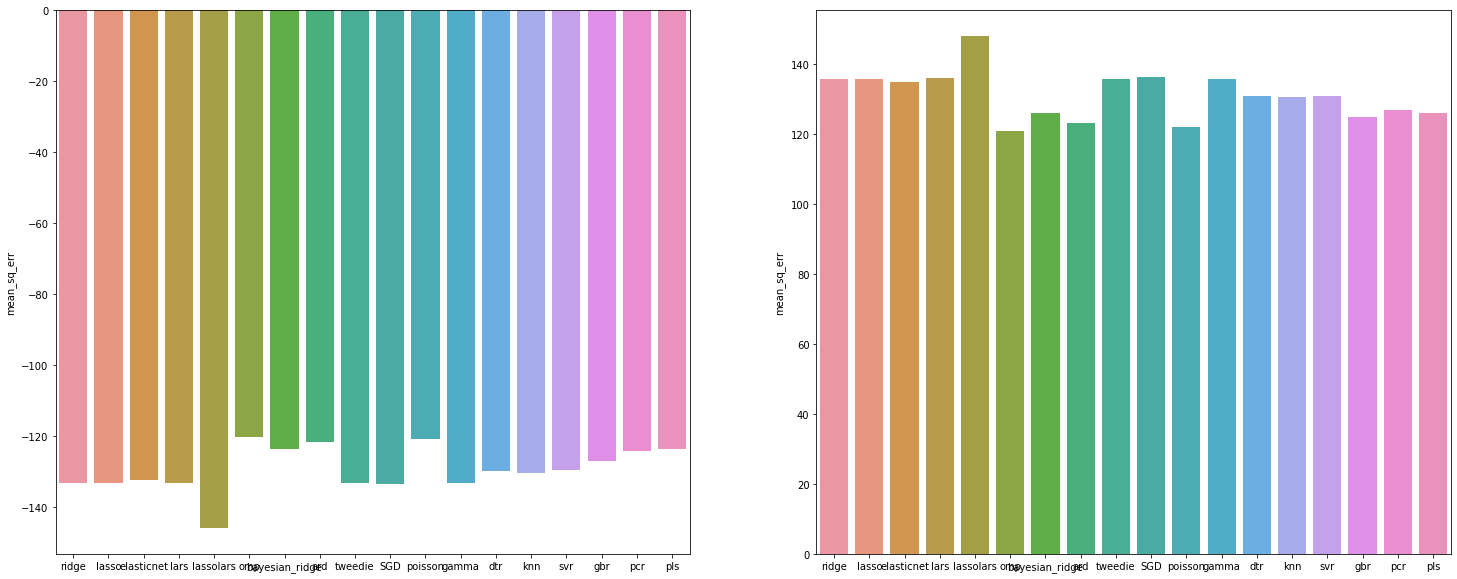

In [ ]:
train_score = pandas.DataFrame(train_score, index = [i[0] for i in params[:]])
test_score = pandas.DataFrame(test_score, index = [i[0] for i in params[:]])
names = [i[0] for i in params]
pyplot.figure(figsize = (25,10))
pyplot.subplot(121)
seaborn.barplot( y = train_score['mean_sq_err'][1:], x = train_score.index[1:])
pyplot.subplot(122)
seaborn.barplot( y = test_score['mean_sq_err'][1:], x = test_score.index[1:])
pyplot.show()
# print(format(train_score['mean_sq_err']))

In [ ]:

clf = RandomizedSearchCV(LassoLars(),
                    param_distributions = {'alpha' : numpy.logspace(0.01,100,100),
                         'normalize': [True, False],
                         'precompute' : [True, False],
                         'positive' :[True, False],
                         'jitter' : numpy.linspace(0.1, 100, 100)},
                    cv = 5,
                    scoring = "neg_mean_squared_error",
                    n_jobs = 5, verbose = 100)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = numpy.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(clf.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -146.103 (std: 12.270)
Parameters: {'precompute': True, 'positive': True, 'normalize': False, 'jitter': 7.163636363636363, 'alpha': 2.187761623949534e+33}

Model with rank: 2
Mean validation score: -170.235 (std: 13.894)
Parameters: {'precompute': True, 'positive': False, 'normalize': False, 'jitter': 12.209090909090909, 'alpha': 3.388441561392034e+52}

Model with rank: 3
Mean validation score: -318.954 (std: 19.504)
Parameters: {'precompute': True, 'positive': True, 'normalize': True, 'jitter': 27.345454545454544, 'alpha': 2.8840315031266114e+45}



In [ ]:
train.columns

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            732, 733, 734, 735, 736, 737, 738, 739, 740, 741],
           dtype='int64', length=163)

In [ ]:
# omp best regressor
params = {'precompute': True, 'positive': True, 'normalize': False, 'jitter': 7.163636363636363, 'alpha': 2.187761623949534e+33}
clf = LassoLars(**params)
clf.fit(x_train,y_train)
y_pred = clf.predict(valid)
y_pred.shape, valid.shape

((2093,), (2093, 163))

In [ ]:
y_pred

array([65.92474331, 65.92474331, 65.92474331, ..., 65.92474331,
       65.92474331, 65.92474331])

In [ ]:
y_pred = pandas.DataFrame(y_pred, columns = ['Success_probability'])
deal_title = pandas.DataFrame(deal_title, columns = ['Deal_title'])
# # deal_title.reset_index(drop=True, inplace = True)
# # y_pred.reset_index(drop=True, inplace = True)
submit = pandas.concat([deal_title, y_pred], axis = 1 ,ignore_index=True)
# # submit.to_csv('submit.csv')
submit
# deal_title['Success_probability'] = y_pred
# deal_title

,0,1
0,TitleAD16O,65.924743
1,TitleOW6CR,65.924743
2,TitleVVJQ5,65.924743
3,TitleUS8NA,65.924743
4,Title5VGWW,65.924743
...,...,...
2088,Title2R8VU,65.924743
2089,Title7HCNJ,65.924743
2090,TitleCD5YZ,65.924743
2091,Title8OKXL,65.924743


In [ ]:
submit.columns = ['Deal_title', 'Success_probability']
submit.to_csv('submit.csv')

#Neural Network Model

In [ ]:
train.columns

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            732, 733, 734, 735, 736, 737, 738, 739, 740, 741],
           dtype='int64', length=163)

In [ ]:
# gridsearch cross validation in neural network model

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.metrics import MeanSquaredError
x_train.astype(int)
x_test.astype(int)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = numpy.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

def nn_model(activation = 'relu', neurons = 32, optimizer = 'Adam',dropout = 0.1, init_mode = 'uniform'):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 163, kernel_initializer = init_mode, activation= activation))
    model.add(Dense((neurons*2)//3, kernel_initializer = init_mode,activation= activation))
    model.add(Dense((neurons*4)//9,kernel_initializer = init_mode,  activation = activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer = init_mode, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer= optimizer, metrics=[MeanSquaredError()])
    return model

# Defining grid parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'selu', 'elu', 'tanh','sigmoid', 'linear']
neurons = range(1, 1600, 150)
dropout = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ['SGD', 'Adam', 'Adamax','RMSprop','Adagrad','Adadelta','Nadam','Ftrl']
batch_size = range(10,101,10)
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer, dropout = dropout, init_mode = init_mode, batch_size = batch_size)

kr = KerasRegressor(build_fn= nn_model, epochs= 5, batch_size = 40, verbose = 1)

model = RandomizedSearchCV(estimator= kr,cv = 3, param_distributions = param_grid, n_jobs=5, verbose = 100)
model.fit(x_train,y_train)

report(model.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [ -133.21503703            nan  -126.64923604 -3029.23942057
  -140.01998901  -135.87299856 -3458.16837565 -4019.18457031
 -2542.36702474  -145.93502299]
  category=UserWarning


Epoch 1/5
106/106 [==============================] - 1s 2ms/step - loss: 2931.8180 - mean_squared_error: 2931.8180
Epoch 2/5
106/106 [==============================] - 0s 1ms/step - loss: 205.9785 - mean_squared_error: 205.9785
Epoch 3/5
106/106 [==============================] - 0s 2ms/step - loss: 205.0560 - mean_squared_error: 205.0560
Epoch 4/5
106/106 [==============================] - 0s 2ms/step - loss: 199.5303 - mean_squared_error: 199.5303
Epoch 5/5
106/106 [==============================] - 0s 1ms/step - loss: 186.5293 - mean_squared_error: 186.5293
Model with rank: 1
Mean validation score: -126.649 (std: 9.584)
Parameters: {'optimizer': 'Adamax', 'neurons': 151, 'init_mode': 'normal', 'dropout': 0.4, 'batch_size': 50, 'activation': 'softplus'}

Model with rank: 2
Mean validation score: -133.215 (std: 9.626)
Parameters: {'optimizer': 'SGD', 'neurons': 151, 'init_mode': 'zero', 'dropout': 0.0, 'batch_size': 50, 'activation': 'linear'}

Model with rank: 3
Mean validation score

In [ ]:
# gridsearch cross validation in neural network model

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.metrics import MeanSquaredError

def nn_model(activation = 'softplus', neurons = 163, optimizer = 'Adamax', dropout = 0.4, init_mode = 'normal'):
    model = Sequential()
    model.add(Dense(neurons, input_dim =163, kernel_initializer = init_mode, activation= activation))
    model.add(Dense((neurons*2)//3, kernel_initializer = init_mode, activation = activation))
    model.add(Dense((neurons*4)//9, kernel_initializer= init_mode,  activation = activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer = init_mode, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer= optimizer, metrics=[MeanSquaredError()])
    return model

kr = KerasRegressor(build_fn= nn_model, epochs=89, verbose=1, batch_size = 50)
kr.fit(x_train,y_train)
y_train_pred = kr.predict(x_train)
y_pred = kr.predict(x_test)

print('train_score : ')
print('  mean_sq_err : ', mean_squared_error(y_train,y_train_pred))
print('  max_err : ', max_error(y_train,y_train_pred))
print('  r2 : ',r2_score(y_train,y_train_pred))
# print('  percent_err : ', mean_absolute_percentage_error(y_train,y_train_pred))

print('test_score : ') 
print('  mean_sq_err : ', mean_squared_error(y_test,y_pred))
print('  max_err : ', max_error(y_test,y_pred))
print('  r2 : ',r2_score(y_test,y_pred))
# print('  percent_err : ', mean_absolute_percentage_error(y_test,y_pred))


Epoch 1/89
106/106 [==============================] - 1s 2ms/step - loss: 2667.5191 - mean_squared_error: 2667.5191
Epoch 2/89
106/106 [==============================] - 0s 2ms/step - loss: 212.0946 - mean_squared_error: 212.0946
Epoch 3/89
106/106 [==============================] - 0s 2ms/step - loss: 194.1456 - mean_squared_error: 194.1456
Epoch 4/89
106/106 [==============================] - 0s 2ms/step - loss: 199.1477 - mean_squared_error: 199.1477
Epoch 5/89
106/106 [==============================] - 0s 2ms/step - loss: 189.7190 - mean_squared_error: 189.7190
Epoch 6/89
106/106 [==============================] - 0s 2ms/step - loss: 182.3588 - mean_squared_error: 182.3588
Epoch 7/89
106/106 [==============================] - 0s 2ms/step - loss: 166.3217 - mean_squared_error: 166.3217
Epoch 8/89
106/106 [==============================] - 0s 2ms/step - loss: 174.0529 - mean_squared_error: 174.0529
Epoch 9/89
106/106 [==============================] - 0s 2ms/step - loss: 173.8755 - m

In [ ]:
valid.astype(int)
y_valid = kr.predict(valid)
deal_title = pandas.DataFrame(deal_title)
submit = deal_title.copy()
submit['1'] = y_valid
submit.columns = ['Deal_title', 'Success_probability']
submit.to_csv('submit.csv')

42/42 [==============================] - 0s 1ms/step


In [ ]:
submit

,Deal_title,Success_probability
0,TitleAD16O,58.075634
1,TitleOW6CR,67.361511
2,TitleVVJQ5,66.857651
3,TitleUS8NA,61.295425
4,Title5VGWW,60.850029
...,...,...
2088,Title2R8VU,67.041626
2089,Title7HCNJ,61.021717
2090,TitleCD5YZ,54.759258
2091,Title8OKXL,56.726673
